This file only contains codes related to model planning.

# 1. Import data & libraries

In [ ]:
import pandas as pd

In [ ]:
diabetes= pd.read_csv('clean_data.csv')
diabetes.head()

,Unnamed: 0,Diabetes,AGEP_A,Education,BMI,Health,HighBP,HighChol,Stroke,HeartAttack,...,Fruit_Daily,Fruit_Weekly,Fruit_Monthly,Salad_Never,Salad_Daily,Salad_Weekly,Salad_Monthly,Sleep_6h,Sleep_6to9h,Sleep_9h
0,0,0,85,4,2,2,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,1,0,64,8,4,3,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0
2,2,1,37,8,4,3,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,3,0,72,5,4,2,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,4,0,84,6,3,2,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [ ]:
diabetes['Diabetes'].value_counts()

0    22911
1     2471
Name: Diabetes, dtype: int64

In [ ]:
columntodrop=['Unnamed: 0', 'AGEP_A']
diabetes.drop(columntodrop,axis=1,inplace=True)
print(diabetes)

       Diabetes  Education  BMI  Health  HighBP  HighChol  Stroke  \
0             0          4    2       2       1         0       0   
1             0          8    4       3       1         1       0   
2             1          8    4       3       0         0       0   
3             0          5    4       2       1         0       0   
4             0          6    3       2       1         0       0   
...         ...        ...  ...     ...     ...       ...     ...   
25377         0          4    3       3       0         0       0   
25378         0          8    2       2       0         1       0   
25379         0          7    2       1       0         1       0   
25380         0          7    4       2       0         1       0   
25381         0          9    3       2       0         1       0   

       HeartAttack  HeartDisease  ChronicDisease  ...  Fruit_Daily  \
0                0             0               0  ...            0   
1                0             

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
missingval=diabetes.isnull().sum()
print(missingval)

Diabetes               0
Education              0
BMI                    0
Health                 0
HighBP                 0
HighChol               0
Stroke                 0
HeartAttack            0
HeartDisease           0
ChronicDisease         0
UrgentCare             0
Emergency              0
Hospitalized           0
Prescription           0
Equipment_Walk         0
Smoke                  0
Alcohol                0
Age_Group              0
Race_White             0
Race_Black             0
Race_Asian             0
Race_AIAN              0
Race_Mixed             0
Race_Others            0
Female                 0
Male                   0
Education.1            0
Last_Doctor_Visit      0
Exercise_Low           0
Exercise_Moderate      0
Exercise_Frequent      0
Soda_Never             0
Soda_Daily             0
Soda_Weekly            0
Soda_Monthly           0
EnergyDrink_Never      0
EnergyDrink_Daily      0
EnergyDrink_Weekly     0
EnergyDrink_Monthly    0
SweetDrink_Never       0


In [ ]:
diabetes.dropna(inplace=True)

In [ ]:
missingval=diabetes.isnull().sum()
print(missingval)

Diabetes               0
Education              0
BMI                    0
Health                 0
HighBP                 0
HighChol               0
Stroke                 0
HeartAttack            0
HeartDisease           0
ChronicDisease         0
UrgentCare             0
Emergency              0
Hospitalized           0
Prescription           0
Equipment_Walk         0
Smoke                  0
Alcohol                0
Age_Group              0
Race_White             0
Race_Black             0
Race_Asian             0
Race_AIAN              0
Race_Mixed             0
Race_Others            0
Female                 0
Male                   0
Education.1            0
Last_Doctor_Visit      0
Exercise_Low           0
Exercise_Moderate      0
Exercise_Frequent      0
Soda_Never             0
Soda_Daily             0
Soda_Weekly            0
Soda_Monthly           0
EnergyDrink_Never      0
EnergyDrink_Daily      0
EnergyDrink_Weekly     0
EnergyDrink_Monthly    0
SweetDrink_Never       0


In [ ]:
diabetes.columns

Index(['Diabetes', 'Education', 'BMI', 'Health', 'HighBP', 'HighChol',
       'Stroke', 'HeartAttack', 'HeartDisease', 'ChronicDisease', 'UrgentCare',
       'Emergency', 'Hospitalized', 'Prescription', 'Equipment_Walk', 'Smoke',
       'Alcohol', 'Age_Group', 'Race_White', 'Race_Black', 'Race_Asian',
       'Race_AIAN', 'Race_Mixed', 'Race_Others', 'Female', 'Male',
       'Education.1', 'Last_Doctor_Visit', 'Exercise_Low', 'Exercise_Moderate',
       'Exercise_Frequent', 'Soda_Never', 'Soda_Daily', 'Soda_Weekly',
       'Soda_Monthly', 'EnergyDrink_Never', 'EnergyDrink_Daily',
       'EnergyDrink_Weekly', 'EnergyDrink_Monthly', 'SweetDrink_Never',
       'SweetDrink_Daily', 'SweetDrink_Weekly', 'SweetDrink_Monthly',
       'Fruit_Never', 'Fruit_Daily', 'Fruit_Weekly', 'Fruit_Monthly',
       'Salad_Never', 'Salad_Daily', 'Salad_Weekly', 'Salad_Monthly',
       'Sleep_6h', 'Sleep_6to9h', 'Sleep_9h'],
      dtype='object')

# 2. Model Building

In [ ]:
X = diabetes.drop(columns=['Diabetes'])
y = diabetes.Diabetes

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
X = SelectKBest(mutual_info_classif, k=20).fit_transform(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation_test, y_train, y_validation_test = train_test_split(
    X, y, test_size=0.4, random_state=100)
X_validation, X_test, y_validation, y_test = train_test_split(
    X_validation_test, y_validation_test, test_size=0.5, random_state=100)

In [ ]:
print(len(X_train))
print(len(X_validation))
print(len(X_test))
print(len(y_train))
print(len(y_validation))
print(len(y_test))

15229
5076
5077
15229
5076
5077


## 2.1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 2.2 Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

## 2.3 AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

AdaBoostClassifier()

## 2.4 KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## 2.5 DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

## 2.6 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

# 3. Model Evaluation

In [ ]:
print("Accuracy of the models")
print("Logistic regression:", model_LR.score(X_validation, y_validation))
print("naive bayes:", nb_model.score(X_validation, y_validation))
print("ADABoost:", adaboost.score(X_validation, y_validation))
print("kNN:", knn_model.score(X_validation, y_validation))
print("Decision tree:", dt_model.score(X_validation, y_validation))
print("Random forest:", rf_model.score(X_validation, y_validation))

Accuracy of the models
Logistic regression: 0.905043341213554
naive bayes: 0.8014184397163121
ADABoost: 0.9054373522458629
kNN: 0.8934200157604413
Decision tree: 0.8546099290780141
Random forest: 0.8926319936958235


In [ ]:
from sklearn.metrics import f1_score

lr_predicted_labels = model_LR.predict(X_validation)
lr_f1_score = f1_score(y_validation, lr_predicted_labels)
nb_predicted_labels = nb_model.predict(X_validation)
nb_f1_score = f1_score(y_validation, nb_predicted_labels)
adaboost_predicted_labels = adaboost.predict(X_validation)
adaboost_f1_score = f1_score(y_validation, adaboost_predicted_labels)
knn_predicted_labels = knn_model.predict(X_validation)
knn_f1_score = f1_score(y_validation, knn_predicted_labels)
dt_predicted_labels = dt_model.predict(X_validation)
dt_f1_score = f1_score(y_validation, dt_predicted_labels)
rf_predicted_labels = rf_model.predict(X_validation)
rf_f1_score = f1_score(y_validation, rf_predicted_labels)

print("F1-score of the models")
print("Logistic regression:", lr_f1_score)
print("naive bayes:", nb_f1_score)
print("Adaboost:", adaboost_f1_score)
print("kNN:", knn_f1_score)
print("Decision tree:", dt_f1_score)
print("Random Forest:", rf_f1_score)

F1-score of the models
Logistic regression: 0.22508038585209
naive bayes: 0.3942307692307692
Adaboost: 0.2546583850931677
kNN: 0.2390998593530239
Decision tree: 0.2890173410404624
Random Forest: 0.21356421356421357


# 4. SMOTE
As seen from the evaluation results, although accuracy is high, F1-score is extremely low, indicating a biased models. This results from the fact that only 10% of the dataset are those with diabetes. To solve this problem, I used SMOTE method to oversample the minority group (diabetic)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X, y)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation_test, y_train, y_validation_test = train_test_split(
    X_res, y_res, test_size=0.4, random_state=100)
X_validation, X_test, y_validation, y_test = train_test_split(
    X_validation_test, y_validation_test, test_size=0.5, random_state=100)

In [ ]:
print(len(X_train))
print(len(X_validation))
print(len(X_test))
print(len(y_train))
print(len(y_validation))
print(len(y_test))

27493
9164
9165
27493
9164
9165


# 5. Tuning hyperparameter

## 5.1 Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Define the hyperparameters to tune
param_grid = {'C': [0.1, 1.0, 10.0,100.0],  # Regularization parameter
              'solver': ['newton-cg', 'sag', 'saga', 'liblinear', 'lbfgs'],  # Solver algorithm
              'penalty': ['l1', 'l2', 'elasticnet', 'none'],}
              # Penalty term ('l1' for L1 regularization, 'l2' for L2 regularization)


# Initialize the Logistic Regression classifier
logreg = LogisticRegression()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the validation data using the best model
y_pred_validation = best_model.predict(X_validation)

# Calculate the accuracy of the model on the validation data
accuracy_validation = accuracy_score(y_validation, y_pred_validation)
print("Validation Accuracy:", accuracy_validation)

# Make predictions on the testing data using the best model
y_pred_test = best_model.predict(X_test)

# Calculate the accuracy of the model on the testing data
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", accuracy_test)
print("Best Hyperparameters:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Validation Accuracy: 0.7674596246180707
Testing Accuracy: 0.764102564102564
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
from sklearn.metrics import f1_score, recall_score, roc_auc_score,roc_curve, precision_score, accuracy_score, confusion_matrix


# Make predictions on the validation data using the best model
y_pred_validation = best_model.predict(X_validation)

# Calculate the accuracy, F1 score, and AUC-ROC of the model on the validation data
accuracy_validation = accuracy_score(y_validation, y_pred_validation)
f1_validation = f1_score(y_validation, y_pred_validation)
sensitivity_validation=recall_score(y_validation,y_pred_validation)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_validation, y_pred_validation)
precision_validation = precision_score(y_validation, y_pred_validation)
auc_roc_validation = roc_auc_score(y_validation, y_pred_validation)


print("Validation Accuracy:", accuracy_validation)
print("Validation F1 Score:", f1_validation)
print("Validation Sensitivity",sensitivity_validation)
print("Validation Precision",precision_validation)
print("Validation Specificity",fpr_valid[1])
print("Validation AUC-ROC:", auc_roc_validation)


# Make predictions on the testing data using the best model
y_pred_test = best_model.predict(X_test)

# Calculate the accuracy, F1 score, and AUC-ROC of the model on the testing data
accuracy_test = accuracy_score(y_test, y_pred_test)
sensitivity_test=recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
auc_roc_test = roc_auc_score(y_test, y_pred_test)
print("Testing Accuracy:", accuracy_test)
print("Testing F1 Score:", f1_test)
print("Testing Sensitivity",sensitivity_test)
print("Testing Precision",precision_test)
print("Testing Specificity",fpr_test[1])
print("Testing AUC-ROC:", auc_roc_test)
print("Best Hyperparameters:", best_params) #logistic regression

Validation Accuracy: 0.7674596246180707
Validation F1 Score: 0.7776734480959834
Validation Sensitivity 0.8216490299823633
Validation Precision 0.7381659734600912
Validation Specificity 0.28565254969749354
Validation AUC-ROC: 0.7679982401424348
Testing Accuracy: 0.764102564102564
Testing F1 Score: 0.7781654011902319
Testing Sensitivity 0.8149580915538363
Testing Precision 0.7445513449833104
Testing Specificity 0.2883421985815603
Testing AUC-ROC: 0.763307946486138
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


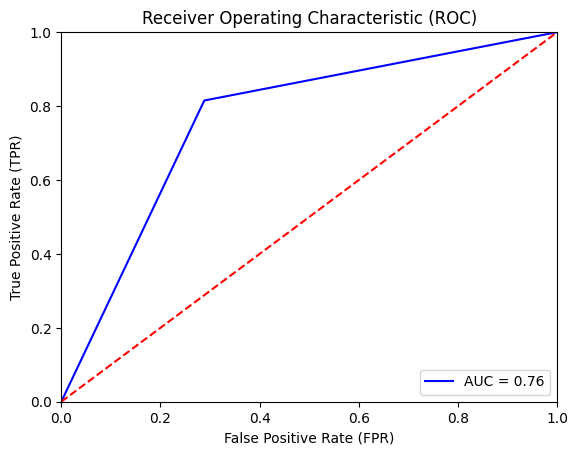

In [ ]:
from sklearn.metrics import auc
roc_auc = auc(fpr_test, tpr_test)

import matplotlib.pyplot as plt
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## 5.2 Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Make predictions on the validation data
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_nbpred_validation = nb_model.predict(X_validation)

# Calculate the accuracy, F1 score, and AUC-ROC of the model on the validation data
accuracy_validation = accuracy_score(y_validation, y_nbpred_validation)
f1_validation = f1_score(y_validation, y_nbpred_validation)
sensitivity_validation=recall_score(y_validation,y_nbpred_validation)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_validation, y_nbpred_validation)
precision_validation = precision_score(y_validation, y_nbpred_validation)
auc_roc_validation = roc_auc_score(y_validation, y_nbpred_validation)


print("Validation Accuracy:", accuracy_validation)
print("Validation F1 Score:", f1_validation)
print("Validation Sensitivity",sensitivity_validation)
print("Validation Precision",precision_validation)
print("Validation Specificity",fpr_valid[1])
print("Validation AUC-ROC:", auc_roc_validation)


# Make predictions on the testing data using the best model
y_nbpred_test = nb_model.predict(X_test)

# Calculate the accuracy, F1 score, and AUC-ROC of the model on the testing data
accuracy_test = accuracy_score(y_test, y_nbpred_test)
sensitivity_test=recall_score(y_test, y_nbpred_test)
f1_test = f1_score(y_test, y_nbpred_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_nbpred_test)
precision_test = precision_score(y_test, y_nbpred_test)
auc_roc_test = roc_auc_score(y_test, y_nbpred_test)
print("Testing Accuracy:", accuracy_test)
print("Testing F1 Score:", f1_test)
print("Testing Sensitivity",sensitivity_test)
print("Testing Precision",precision_test)
print("Testing Specificity",fpr_test[1])
print("Testing AUC-ROC:", auc_roc_test) #nb

Validation Accuracy: 0.74257965953732
Validation F1 Score: 0.7687481619449074
Validation Sensitivity 0.8644179894179894
Validation Precision 0.6921447484554281
Validation Specificity 0.37683664649956783
Validation AUC-ROC: 0.7437906714592107
Testing Accuracy: 0.7493726132024005
Testing F1 Score: 0.7777025065324689
Testing Sensitivity 0.8635289060820975
Testing Precision 0.7073943661971831
Testing Specificity 0.3683510638297872
Testing AUC-ROC: 0.7475889211261552


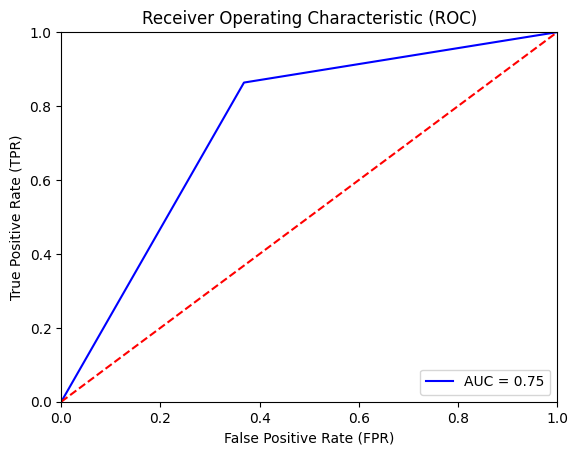

In [ ]:
from sklearn.metrics import auc
roc_auc = auc(fpr_test, tpr_test)

import matplotlib.pyplot as plt
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## 5.3 AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
adaboost_parameters = {'n_estimators': [50, 100,150, 200,250,300],  # Number of base classifiers
                       'learning_rate': [0.1, 0.5, 1.0]}  # Learning rate

# Initialize the AdaBoost classifier
adaboost = AdaBoostClassifier()

# Perform grid search for hyperparameter tuning
adaboost_gs = GridSearchCV(estimator=adaboost, param_grid=adaboost_parameters)
adaboost_gs.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_params = adaboost_gs.best_params_
adaboost_winner = adaboost_gs.best_estimator_

# Calculate the accuracy, F1 score, and AUC-ROC on the validation data using the best model
y_adpred_validation = adaboost_winner.predict(X_validation)
# Calculate the accuracy, F1 score, and AUC-ROC of the model on the validation data
accuracy_validation = accuracy_score(y_validation, y_adpred_validation)
f1_validation = f1_score(y_validation, y_adpred_validation)
sensitivity_validation=recall_score(y_validation,y_adpred_validation)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_validation, y_adpred_validation)
precision_validation = precision_score(y_validation, y_adpred_validation)
auc_roc_validation = roc_auc_score(y_validation, y_adpred_validation)


print("Validation Accuracy:", accuracy_validation)
print("Validation F1 Score:", f1_validation)
print("Validation Sensitivity",sensitivity_validation)
print("Validation Precision",precision_validation)
print("Validation Specificity",fpr_valid[1])
print("Validation AUC-ROC:", auc_roc_validation)


# Make predictions on the testing data using the best model
y_adpred_test = adaboost_winner.predict(X_test)

# Calculate the accuracy, F1 score, and AUC-ROC of the model on the testing data
accuracy_test = accuracy_score(y_test, y_adpred_test)
sensitivity_test=recall_score(y_test, y_adpred_test)
f1_test = f1_score(y_test, y_adpred_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_adpred_test)
precision_test = precision_score(y_test, y_adpred_test)
auc_roc_test = roc_auc_score(y_test, y_adpred_test)
print("Testing Accuracy:", accuracy_test)
print("Testing F1 Score:", f1_test)
print("Testing Sensitivity",sensitivity_test)
print("Testing Precision",precision_test)
print("Testing Specificity",fpr_test[1])
print("Testing AUC-ROC:", auc_roc_test)
print("Best Hyperparameters:", best_params) #adaboosting

Validation Accuracy: 0.7645133129637712
Validation F1 Score: 0.7753955037468777
Validation Sensitivity 0.8212081128747796
Validation Precision 0.7344242902208202
Validation Specificity 0.2910544511668107
Validation AUC-ROC: 0.7650768308539845
Testing Accuracy: 0.7663938897981452
Testing F1 Score: 0.7802975885069265
Testing Sensitivity 0.8171072426391576
Testing Precision 0.746661429693637
Testing Specificity 0.2859042553191489
Testing AUC-ROC: 0.7656014936600044
Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 150}


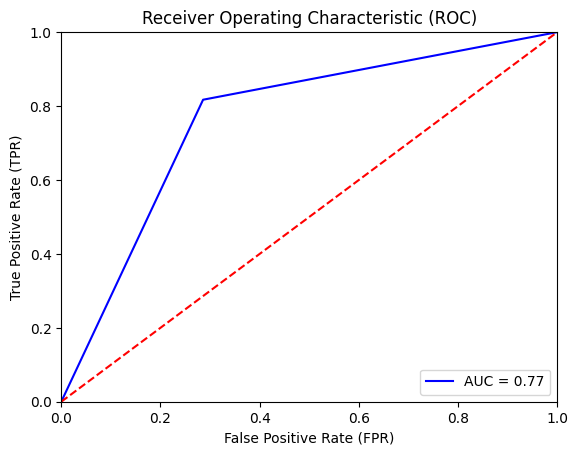

In [ ]:
from sklearn.metrics import auc
roc_auc = auc(fpr_test, tpr_test)

import matplotlib.pyplot as plt
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## 5.4 KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_validation = scaler.fit_transform(X_validation)
X_scaled_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

mean_acc = np.zeros(164)

for i in range(1,165):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_scaled_train,y_train)
    yhat= knn.predict(X_scaled_validation)
    mean_acc[i-1] = accuracy_score(y_validation, yhat)

mean_acc
#choosing k from 1 to 159 (159 comes from the square root of 25382, the number of rows of the data set)

array([0.85977739, 0.83151462, 0.83435181, 0.82933217, 0.82474902,
       0.82518551, 0.81438237, 0.81558271, 0.80663466, 0.80707115,
       0.80161502, 0.80281536, 0.79419467, 0.79801397, 0.78906591,
       0.78928416, 0.7837189 , 0.78568311, 0.78175469, 0.78284592,
       0.78022698, 0.7803361 , 0.77826277, 0.7789175 , 0.77597119,
       0.77837189, 0.77575295, 0.77760803, 0.77400698, 0.77706242,
       0.77346137, 0.7765168 , 0.77182453, 0.7745526 , 0.77226102,
       0.77433435, 0.77324313, 0.77258839, 0.77084243, 0.77269751,
       0.77018769, 0.77237014, 0.76931471, 0.77291576, 0.77193365,
       0.7697512 , 0.76942383, 0.7697512 , 0.76898734, 0.77095155,
       0.7687691 , 0.76789612, 0.76658664, 0.76745962, 0.76691401,
       0.76756875, 0.76625928, 0.76538629, 0.76538629, 0.76429507,
       0.76462244, 0.76276735, 0.76276735, 0.76407682, 0.76276735,
       0.76265823, 0.76374945, 0.76309472, 0.76102139, 0.76287647,
       0.76374945, 0.7629856 , 0.76233086, 0.76243998, 0.76123

In [ ]:
max(mean_acc)

0.8438454823221301

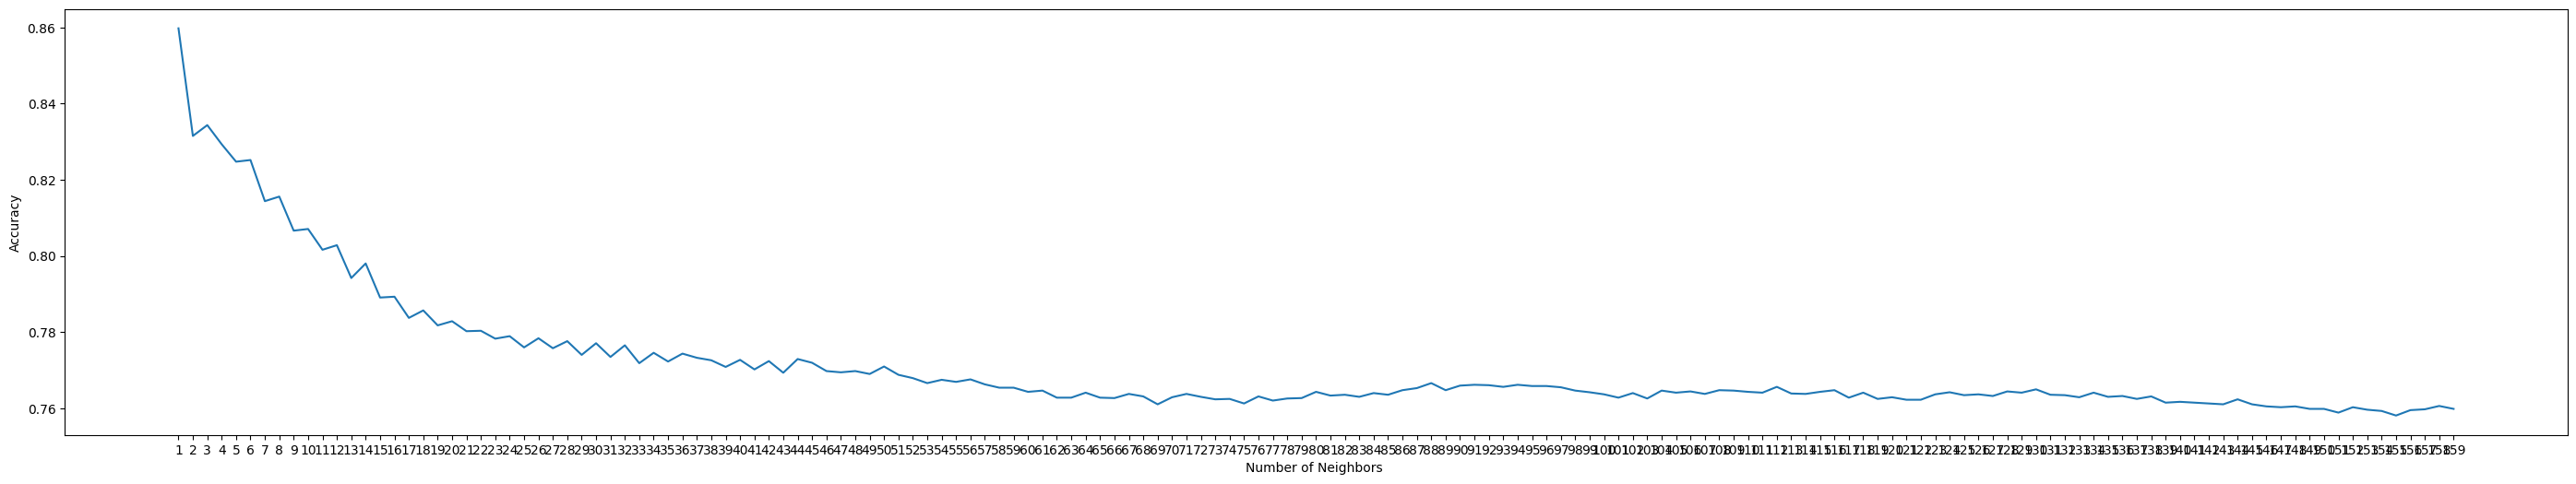

In [ ]:
loc = np.arange(1,160,step=1.0)
plt.figure(figsize = (35, 6))
plt.plot(range(1,160), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled_train, y_train)
print("Accuracy of kNN model when k = 3:", knn.score(X_scaled_validation, y_validation))

y_knn_test = knn.predict(X_scaled_validation)
f1_knn_test = f1_score(y_validation, y_knn_test)
print("F1-score of kNN model when k = 3:", f1_knn_test)

Accuracy of kNN model when k = 3: 0.8343518114360541
F1-score of kNN model when k = 3: 0.8450387913434054


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, \
   recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

y_pred = knn.predict(X_scaled_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print('Accuracy:', accuracy)
print('Sensitivity:', tpr[1])
print('Specificity:', fpr[1])
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('ROC AUC score:', roc_auc) #knn

Accuracy: 0.8379705400981997
Sensitivity: 0.9234902213625618
Specificity: 0.25022163120567376
Precision: 0.791927755252488
Recall: 0.9234902213625618
F1-score: 0.8526639547574164
ROC AUC score: 0.836634295078444


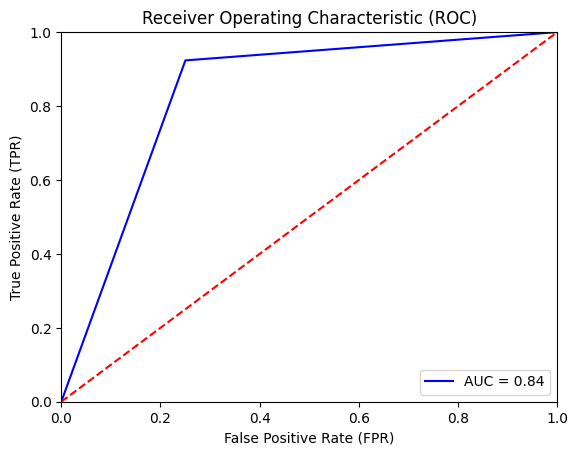

In [ ]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## 5.5 Decision Tree

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_depth': [5, 10, 15, 20],'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 2, 5, 10]}

# Create the decision tree classifier
tree = DecisionTreeClassifier()

# Perform grid search
tree_grid_search = GridSearchCV(tree, param_grid)
tree_grid_search.fit(X_train, y_train)

tree_best_params = tree_grid_search.best_params_
tree_winner = tree_grid_search.best_estimator_

tree_winner
tree_winner.score(X_validation, y_validation)

print("Best Hyperparameters:", tree_best_params)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
tree_winner

DecisionTreeClassifier(max_depth=20)

In [ ]:
tree_winner.score(X_validation, y_validation)

print("accuracy of dt:", tree_winner.score(X_validation, y_validation))
y_dt_test = tree_winner.predict(X_validation)
f1_dt_test = f1_score(y_validation, y_dt_test)
print("F1-score of dt:", f1_dt_test)

accuracy of dt: 0.8654517677869926
F1-score of dt: 0.8712540461522398


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, \
   recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

y_pred = tree_winner.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print('Accuracy:', accuracy)
print('Sensitivity:', tpr[1])
print('Specificity:', fpr[1])
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('ROC AUC score:', roc_auc) #dt

Accuracy: 0.8626295690125477
Sensitivity: 0.9187620889748549
Specificity: 0.19525709219858156
Precision: 0.8291311093871218
Recall: 0.9187620889748549
F1-score: 0.8716484860842084
ROC AUC score: 0.8617524983881366


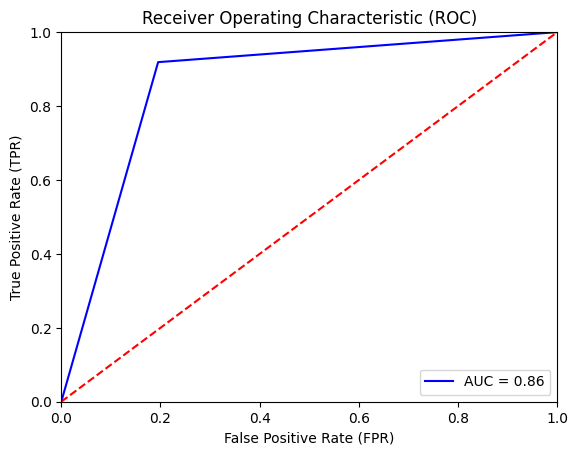

In [ ]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## 5.6 Random Forest

In [ ]:
#random forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {'max_depth': [5, 10, 15, 20],'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 2, 5, 10]}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Create the GridSearchCV object
rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid)

# Perform grid search on the dataset
rf_grid_search.fit(X_train, y_train)

rf_best_params = rf_grid_search.best_params_
rf_winner = rf_grid_search.best_estimator_


rf_winner
rf_winner.score(X_validation, y_validation)

print("Best Hyperparameters:", rf_best_params)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
rf_winner.score(X_validation, y_validation)

print("accuracy of rf:", rf_winner.score(X_validation, y_validation))
y_rf_test = rf_winner.predict(X_validation)
f1_rf_test = f1_score(y_validation, y_rf_test)
print("F1-score of rf:", f1_rf_test)

accuracy of dt: 0.8988432998690529
F1-score of dt: 0.9031449169365793


In [ ]:
rf_winner.score(X_validation, y_validation)

print("accuracy of rf:", rf_winner.score(X_validation, y_validation))
y_rf_test = rf_winner.predict(X_validation)
f1_rf_test = f1_score(y_validation, y_rf_test)
print("F1-score of rf:", f1_rf_test)

accuracy of rf: 0.5363378437363596
F1-score of rf: 0.15070957425544673


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_winner.fit(X_train, y_train)
rf_winner.score(X_test, y_test)

0.8960174577195854

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, \
   recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

y_pred = rf_winner.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print('Accuracy:', accuracy)
print('Sensitivity:', tpr[1])
print('Specificity:', fpr[1])
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('ROC AUC score:', roc_auc) #rf

Accuracy: 0.8960174577195854
Sensitivity: 0.9522888459058672
Specificity: 0.16201241134751773
Precision: 0.8583882216195273
Recall: 0.9522888459058672
F1-score: 0.9029037187977585
ROC AUC score: 0.8951382172791746


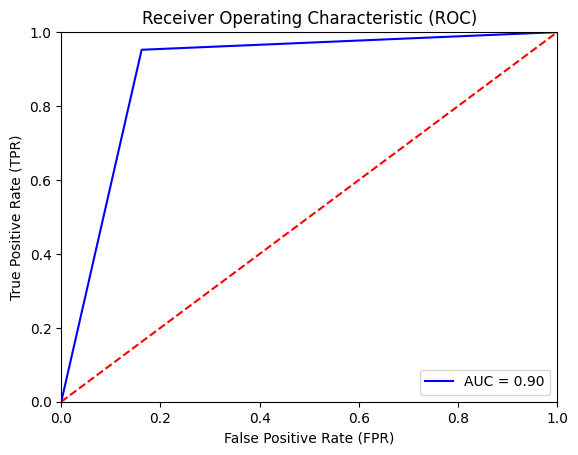

In [ ]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

From the above experiment, it is concluded that Random Forest is the best model.

## 5.7 Clustering using K-Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Initialize the KMeans clustering algorithm
kmeans = KMeans(n_clusters=10, random_state=42)  # Set the number of clusters as desired

# Fit the KMeans model to your data
kmeans.fit(X)

# Obtain the cluster labels for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_

# Add cluster labels to the dataset
diabetes['cluster_label'] = labels

# Display cluster details
cluster_details = diabetes.groupby('cluster_label').mean()
print(cluster_details)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


               Diabetes  Education       BMI    Health    HighBP  HighChol  \
cluster_label                                                                
0              0.037343   8.480331  2.488312  1.601197  0.269099  0.316705   
1              0.086387   4.462478  3.476003  3.055846  0.339442  0.228621   
2              0.268215   4.322622  3.230353  3.570474  0.738785  0.597836   
3              0.003736   8.296196  2.400815  1.605639  0.047215  0.077106   
4              0.240506   1.179449  3.038719  3.310499  0.640357  0.527178   
5              0.007831   4.512138  2.756069  1.787001  0.063430  0.045419   
6              0.033292   1.414303  3.018496  2.347719  0.146732  0.115906   
7              0.042478   8.003186  3.525310  2.583717  0.261947  0.211681   
8              0.194538   7.924477  3.280850  3.060351  0.684423  0.579906   
9              0.073765   4.570427  2.833111  1.849800  0.394192  0.359146   

                 Stroke  HeartAttack  HeartDisease  ChronicDise

##changing hyperparameters (n_estimators=20)

In [ ]:
# Initialize the KMeans clustering algorithm
kmeans = KMeans(n_clusters=20, random_state=42)  # Set the number of clusters as desired

# Fit the KMeans model to your data
kmeans.fit(X)

# Obtain the cluster labels for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_

# Add cluster labels to the dataset
diabetes['cluster_label'] = labels

# Display cluster details
cluster_details = diabetes.groupby('cluster_label').mean()
print(cluster_details)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


               Diabetes  Education       BMI    Health    HighBP  HighChol  \
cluster_label                                                                
0              0.074009   5.266079  3.290749  2.463436  0.291630  0.194714   
1              0.121810   4.215777  1.924594  3.135731  0.563805  0.470998   
2              0.009070   9.377929  2.562358  1.762661  0.111867  0.164777   
3              0.134096   9.377760  3.089125  2.281276  0.569092  0.527392   
4              0.003003   4.502252  2.198198  1.641892  0.034535  0.029279   
5              0.241119   1.171580  3.035525  3.318216  0.642479  0.532880   
6              0.034340   8.089402  2.194198  1.554174  0.251036  0.297809   
7              0.058005   3.867749  3.242846  2.523589  0.262954  0.194896   
8              0.036635   1.261872  3.024423  2.352782  0.151967  0.118046   
9              0.001716   8.032609  2.470252  1.655606  0.041762  0.066362   
10             0.033333   4.431481  2.506481  1.362963  0.195370

In [ ]:
from sklearn import metrics
silhouette_samples = metrics.silhouette_samples(X, kmeans.labels_)
print(silhouette_samples)
k=3
print("Average of Silhouette Coefficients for k =", k)
print("============================================")
print("Silhouette mean:", silhouette_samples.mean())
silhouette_avgs = []
min_k = 2

#---try k from 2 to maximum number of labels---
for k in range(min_k, 30):
   kmean = KMeans(n_clusters=k).fit(X)
   score = metrics.silhouette_score(X, kmean.labels_)
   print("Silhouette Coefficients for k =", k, "is", score)
   silhouette_avgs.append(score)

#---the optimal k is the one with the highest average silhouette---
Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K is ", Optimal_K)

[0.05107868 0.16846765 0.18444164 ... 0.13466146 0.04262472 0.03885891]
Average of Silhouette Coefficients for k = 3
Silhouette mean: 0.10855559472486115


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 2 is 0.3065466084921072


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 3 is 0.2736044176995247


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 4 is 0.22534922898254298


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 5 is 0.22616269606509623


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 6 is 0.1969115355443118


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 7 is 0.16525505228575513


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 8 is 0.16345611878074753


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 9 is 0.14630728846104993


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 10 is 0.13865894729773778


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 11 is 0.13062514550380838


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 12 is 0.12857271600446057


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 13 is 0.12569031982049908


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 14 is 0.11730421255251422


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 15 is 0.11571478091539025


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 16 is 0.11448634203458286


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 17 is 0.11256887315040776


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 18 is 0.11344980275622311


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 19 is 0.11045690706412864


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 20 is 0.11013263724328652


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 21 is 0.10912747026763624


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 22 is 0.10682772387894304


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 23 is 0.10453990731491383


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 24 is 0.10366417207700523


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficients for k = 25 is 0.105053553027543


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
